# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 600
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
# Set default font size
plt.rcParams['font.size'] = 24
import seaborn as sb
# Set default font size
sb.set(font_scale = .8)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sb.set_style("white", rc=custom_style)


# Interactive Visualizations
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# icf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

In [2]:
f = '../../../dataset/4_McNemar_PDX/OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster_perfTab.tsv'
performance_df = pd.read_csv(f, sep='\t', header=0, index_col=0)

### visualise model AUC on training set across replicates

Text(0.5, 1.0, 'test set (N=57) ROC AUC across 10 replicates')

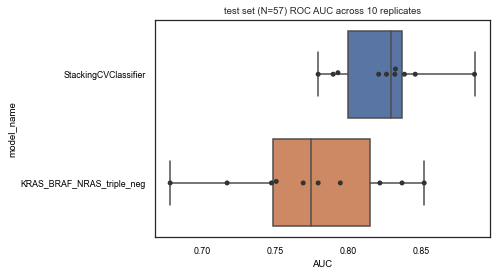

In [4]:
ax = sb.boxplot(x="AUC", y="model_name", data=performance_df, whis=np.inf)
ax = sb.swarmplot(x="AUC", y="model_name", data=performance_df, color=".2")
ax.set_title('test set (N=57) ROC AUC across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggROCAUC_boxswarm_test.pdf', format='pdf', bbox_inches='tight') 

### aggregate replicate confusion matrices by mean and visualise as heatmap

In [8]:
def agg_confMatrix(df):
	aggAvg_confMatrix = pd.DataFrame(np.array([[df['true_PD__pred_PD'].mean(),
			df['true_PD__pred_SD-OR'].mean()],
			[df['true_SD-OR__pred_PD'].mean(),
			df['true_SD-OR__pred_SD-OR'].mean()]]), 
			columns=['pred_PD', 'pred_SD-OR'],
			index=['true_PD', 'true_SD-OR'])
	return aggAvg_confMatrix
stacked_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'StackingCVClassifier'])
tripleNeg_aggAvg_confMatrix = agg_confMatrix(performance_df[performance_df.model_name == 'KRAS_BRAF_NRAS_triple_neg'])  

Text(0.5, 1.0, 'StackingCVClassifier test set (N=57) mean confusion matrix across 10 replicates')

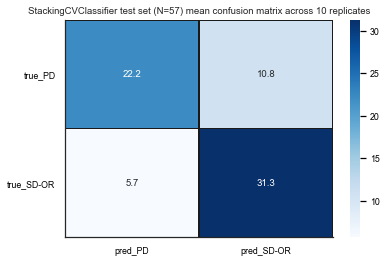

In [10]:
ax = sb.heatmap(aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('StackingCVClassifier test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_test.pdf', format='pdf', bbox_inches='tight') 


Text(0.5, 1.0, 'KRAS_BRAF_NRAS_triple_neg test set (N=57) mean confusion matrix across 10 replicates')

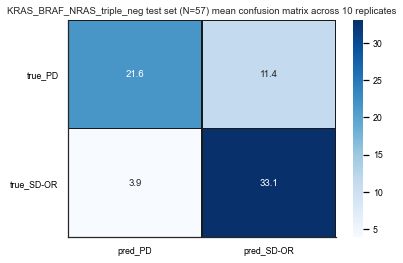

In [9]:
ax = sb.heatmap(tripleNeg_aggAvg_confMatrix, 
		annot=True, 
		fmt=".1f", 
		linewidths=.5,
		cmap='Blues',
		linecolor='k')
sb.despine(ax=ax, offset=0) # show axes to close heatmap border
ax.set_title('KRAS_BRAF_NRAS_triple_neg test set (N=57) mean confusion matrix across 10 replicates')
fig = ax.get_figure()
fig.savefig('aggconfMatrix_heatmap_test.pdf', format='pdf', bbox_inches='tight') 

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here